In [87]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
dataset = pd.read_csv('wine.csv')
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [89]:
dataset.shape

(178, 14)

In [90]:
dataset.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840,3
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560,3


In [91]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

type(X)
type(y)
print("Classes:", np.unique(y))

Classes: [1 2 3]


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [93]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:
X_full_scaled = scaler.fit_transform(X) # For visualization

In [95]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [96]:
pca_vis = PCA(n_components=2)
X_pca_full = pca_vis.fit_transform(X_full_scaled)   # For Visualization!

In [97]:
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train_pca, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [98]:
# Predict
y_pred = classifier.predict(X_test_pca)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9722222222222222


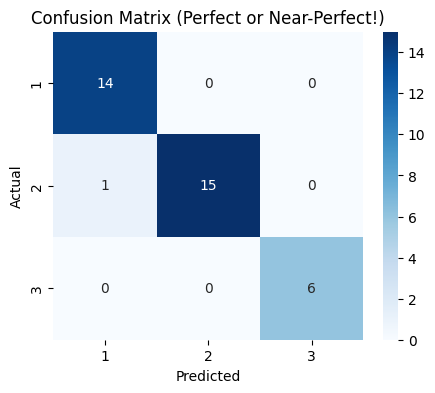

In [99]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[1,2,3], yticklabels=[1,2,3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Perfect or Near-Perfect!)')
plt.show()

In [100]:
"""X_scaled = scaler.fit_transform(X)
pca_vis = PCA(n_components=2)
X_pca = pca_vis.fit_transform(X_scaled)"""

'X_scaled = scaler.fit_transform(X)\npca_vis = PCA(n_components=2)\nX_pca = pca_vis.fit_transform(X_scaled)'

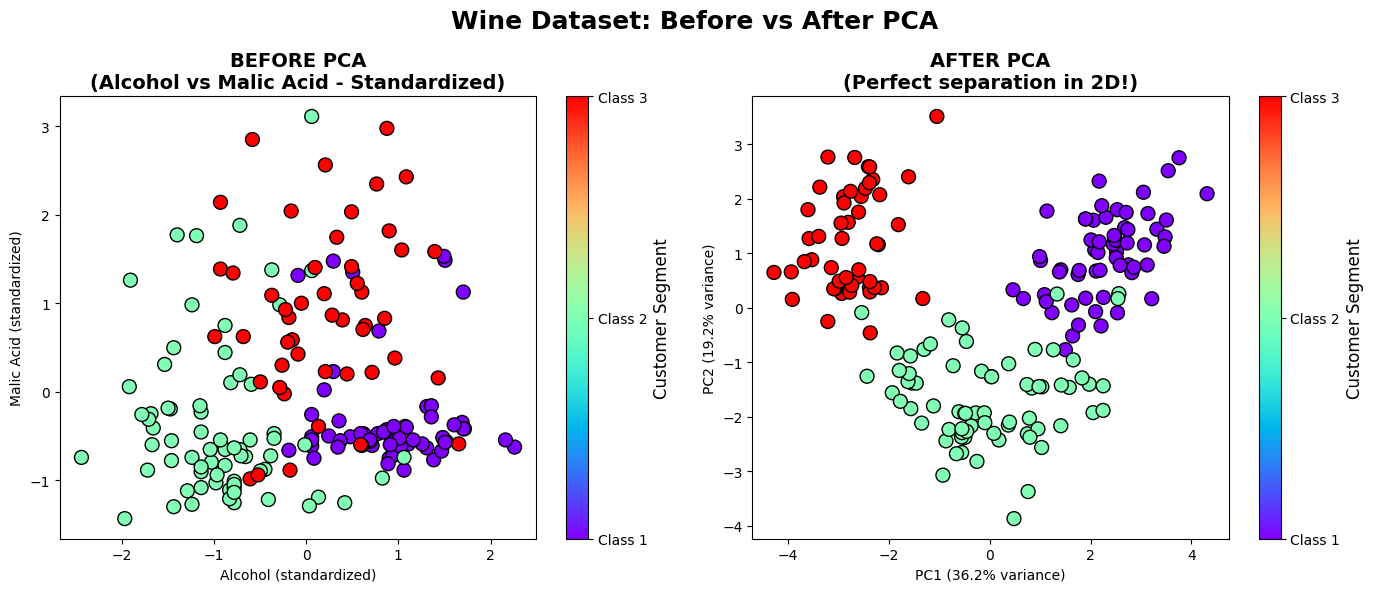

In [101]:
plt.figure(figsize=(14, 6))

# === BEFORE PCA: First 2 original features (Alcohol & Malic Acid) ===
plt.subplot(1, 2, 1)
scatter1 = plt.scatter(X_full_scaled[:, 0],   # Alcohol
                       X_full_scaled[:, 1],   # Malic Acid
                       c=y, cmap='rainbow', edgecolor='k', s=100)

plt.title('BEFORE PCA\n(Alcohol vs Malic Acid - Standardized)', fontsize=14, fontweight='bold')
plt.xlabel('Alcohol (standardized)')
plt.ylabel('Malic Acid (standardized)')

cbar1 = plt.colorbar(scatter1, ticks=[1, 2, 3])
cbar1.set_label('Customer Segment', fontsize=12)
cbar1.set_ticklabels(['Class 1', 'Class 2', 'Class 3'])

# === AFTER PCA: The magic of 2 principal components ===
plt.subplot(1, 2, 2)
scatter2 = plt.scatter(X_pca_full[:, 0],
                       X_pca_full[:, 1],
                       c=y, cmap='rainbow', edgecolor='k', s=100)

plt.title('AFTER PCA\n(Perfect separation in 2D!)', fontsize=14, fontweight='bold')
plt.xlabel(f'PC1 ({pca_vis.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca_vis.explained_variance_ratio_[1]:.1%} variance)')

cbar2 = plt.colorbar(scatter2, ticks=[1, 2, 3])
cbar2.set_label('Customer Segment', fontsize=12)
cbar2.set_ticklabels(['Class 1', 'Class 2', 'Class 3'])

plt.suptitle('Wine Dataset: Before vs After PCA', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()